In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve


In [2]:
#data 
df = pd.read_csv('churn_prediction.csv')

In [3]:
#treating missing values
pd.isnull(df).sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [4]:
#gender
dict_gender = {'Male': 1, 'Female':0}
df.replace({'gender': dict_gender}, inplace = True)

df['gender'] = df['gender'].fillna(-1)

In [5]:
#occupation , dependants , city ,  days since last transaction
df['dependents'] = df['dependents'].fillna(0)
df['occupation'] = df['occupation'].fillna('self_employed')
df['city'] = df['city'].fillna(1020)
df['days_since_last_transaction'] = df['days_since_last_transaction'].fillna(999)

In [6]:
pd.isnull(df).sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [7]:
#data-preprocessing
#converting occupation to one hot encodings
df = pd.concat([df,pd.get_dummies(df['occupation'],prefix = str('occupation'),prefix_sep='_')],axis = 1)
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,1.0,0.0,self_employed,187.0,2,755,224.0,...,0.20,0.20,1458.71,1458.71,0,0,0,0,1,0
1,2,310,35,1.0,0.0,self_employed,1020.0,2,3214,60.0,...,5486.27,100.56,6496.78,8787.61,0,0,0,0,1,0
2,4,2356,31,1.0,0.0,salaried,146.0,2,41,999.0,...,6046.73,259.23,5006.28,5070.14,0,0,0,1,0,0
3,5,478,90,-1.0,0.0,self_employed,1020.0,2,582,147.0,...,0.47,2143.33,2291.91,1669.79,1,0,0,0,1,0
4,6,2531,42,1.0,2.0,self_employed,1494.0,3,388,58.0,...,588.62,1538.06,1157.15,1677.16,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,0.0,0.0,student,1020.0,2,1207,70.0,...,0.30,0.30,1076.43,1076.43,0,0,0,0,0,1
28378,30298,4919,34,0.0,0.0,self_employed,1046.0,2,223,14.0,...,901.00,1014.07,3738.54,3690.32,0,0,0,0,1,0
28379,30299,297,47,1.0,0.0,salaried,1096.0,2,588,0.0,...,168.23,71.80,61078.50,57564.24,1,0,0,1,0,0
28380,30300,2585,50,1.0,3.0,self_employed,1219.0,3,274,999.0,...,0.20,0.20,1625.55,1625.55,0,0,0,0,1,0


In [8]:
#scaling using log transformation and standard scaler
num_cols = ['customer_nw_category', 'current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance']
for i in num_cols:
    df[i] = np.log(df[i] + 17000)

std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)
df_df_og = df.copy()
df = df.drop(columns = num_cols,axis = 1)
df = df.merge(scaled,left_index=True,right_index=True,how = "left")
y_all = df.churn
df = df.drop(['churn','customer_id','occupation'],axis = 1)

In [9]:
df

,vintage,age,gender,dependents,city,branch_code,days_since_last_transaction,occupation_company,occupation_retired,occupation_salaried,...,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,3135,66,1.0,0.0,187.0,755,224.0,0,0,0,...,-0.613738,-0.632367,-0.630646,-0.697612,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207
1,310,35,1.0,0.0,1020.0,3214,60.0,0,0,0,...,0.011267,0.446458,0.949414,0.317595,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680
2,2356,31,1.0,0.0,146.0,41,999.0,0,0,1,...,-0.209651,0.057975,-0.388637,-0.108263,-0.313841,-0.324400,0.729825,-0.321607,-0.068597,-0.066642
3,478,90,-1.0,0.0,1020.0,582,147.0,0,0,0,...,-0.470836,-0.488530,-0.712855,-0.582976,-0.313872,-0.324429,-0.368193,0.060593,-0.506570,-0.628056
4,2531,42,1.0,2.0,1494.0,388,58.0,0,0,0,...,-0.708214,-0.642441,-0.554058,-0.663399,-0.313902,-0.175104,-0.245463,-0.057927,-0.708257,-0.626732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,1845,10,0.0,0.0,1020.0,1207,70.0,0,0,0,...,-0.681476,-0.700548,-0.393466,-0.547552,-0.313909,-0.324466,-0.368230,-0.377369,-0.723081,-0.736426
28378,4919,34,0.0,0.0,1046.0,223,14.0,0,0,0,...,-0.220357,-0.201417,-0.213875,-0.308790,-0.313601,-0.324041,-0.181936,-0.163698,-0.266001,-0.283262
28379,297,47,1.0,0.0,1096.0,588,0.0,0,0,1,...,4.233040,4.063636,1.897512,3.907073,0.585389,0.422031,-0.332759,-0.361886,4.144670,4.018282
28380,2585,50,1.0,3.0,1219.0,274,999.0,0,0,0,...,-0.584614,-0.603052,-0.556517,-0.656050,-0.313931,-0.324487,-0.368251,-0.377390,-0.623519,-0.636016


In [10]:
#model
#useful columns 
useful_cols = ['current_month_debit', 'previous_month_debit','current_balance','previous_month_end_balance','vintage'
                 ,'occupation_retired', 'occupation_salaried','occupation_self_employed', 'occupation_student']

In [11]:
df_useful = df[useful_cols]
df_useful

,current_month_debit,previous_month_debit,current_balance,previous_month_end_balance,vintage,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,-0.368251,-0.377390,-0.613738,-0.632367,3135,0,0,1,0
1,0.640986,-0.355677,0.011267,0.446458,310,0,0,1,0
2,0.729825,-0.321607,-0.209651,0.057975,2356,0,1,0,0
3,-0.368193,0.060593,-0.470836,-0.488530,478,0,0,1,0
4,-0.245463,-0.057927,-0.708214,-0.642441,2531,0,0,1,0
...,...,...,...,...,...,...,...,...,...
28377,-0.368230,-0.377369,-0.681476,-0.700548,1845,0,0,0,1
28378,-0.181936,-0.163698,-0.220357,-0.201417,4919,0,0,1,0
28379,-0.332759,-0.361886,4.233040,4.063636,297,0,1,0,0
28380,-0.368251,-0.377390,-0.584614,-0.603052,2585,0,0,1,0


In [12]:
#train test split
xtrain, xtest, ytrain, ytest = train_test_split(df_useful,y_all,test_size=1/3, random_state=11, stratify = y_all)

In [13]:
model = LogisticRegression(max_iter=10000)
model.fit(xtrain,ytrain)
pred = model.predict_proba(xtest)[:,1]

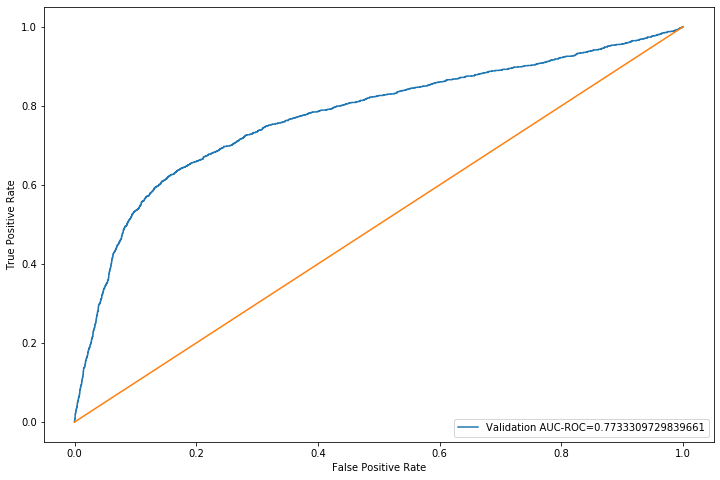

In [14]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,pred) 
auc = roc_auc_score(ytest, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [15]:
pred_val = model.predict(xtest)
pred_val

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, pred_val)

0.8273966811119332